# Elbow Method to Find Number of Clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import K-means 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# Create dataset
X, y= make_blobs(n_samples=450,
                  n_features=2,
                  centers=4,
                  cluster_std=2.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=0)  # For reproducibility
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
X
# NOT USING LABELS ARRAY y!!! It is guessed from the clusters

array([[-2.58643119e+00,  7.89897304e+00],
       [-3.21992891e+00,  1.05720560e+01],
       [-9.93203891e-01, -1.03551873e-01],
       [-2.88941496e+00,  7.49073752e-01],
       [-1.82719858e-01,  5.50749101e+00],
       [ 5.58632679e-01, -1.89207880e+00],
       [ 3.61585226e-01,  5.08640079e+00],
       [ 1.06489705e-01,  4.69465975e+00],
       [-5.60098524e-02,  8.20658397e+00],
       [-5.32931403e+00,  7.66762463e+00],
       [-1.39192957e+00,  6.85741739e+00],
       [ 3.78411440e+00,  2.63453652e+00],
       [ 1.17168815e+00, -3.14352181e+00],
       [ 1.36753642e+00,  4.88423992e+00],
       [ 2.17900498e+00,  2.13225560e+00],
       [-4.85743315e+00, -2.00367946e+00],
       [-2.50787651e+00, -4.69747538e+00],
       [ 2.81562207e-01,  4.48171820e+00],
       [ 2.56256550e-01, -1.13481881e+00],
       [-1.58546178e+00,  5.61586908e+00],
       [-7.12591416e+00,  3.92162990e+00],
       [-2.15571832e+00,  6.24751322e+00],
       [ 3.50123769e+00,  2.80639370e+00],
       [-3.

In [2]:
df

,Feature1,Feature2
0,-2.586431,7.898973
1,-3.219929,10.572056
2,-0.993204,-0.103552
3,-2.889415,0.749074
4,-0.182720,5.507491
...,...,...
445,-2.912678,1.741288
446,7.815059,-1.752376
447,-0.329394,8.311239
448,-0.361488,1.992276


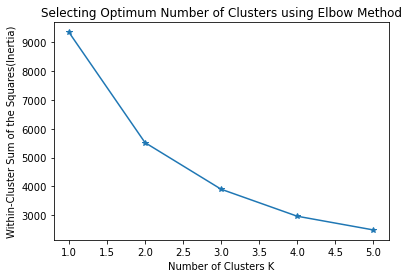

In [3]:
wcss_list = []
# Run a loop for different value of number of cluster
for i in range(1, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(df)
    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters    
plt.plot(range(1, 6), wcss_list,  marker='*')
# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()
#At 4 it begins to flatten, choose 4

## K-Means Clustering

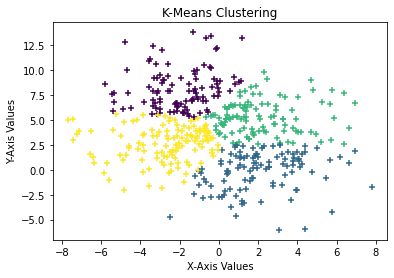

In [6]:
# Define number of clusters
num_clusters = 4
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(df)
 
# Predict the target variable
predictions = km.predict(df)
 
# Plot the Clusters, use 2 features
plt.scatter(df.Feature1,df.Feature2,c=predictions, marker="+", cmap="viridis")
# Set title of the plot 
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

# Silhouette Analysis

For n_clusters = 4 The average silhouette_score is : 0.3450294545880598


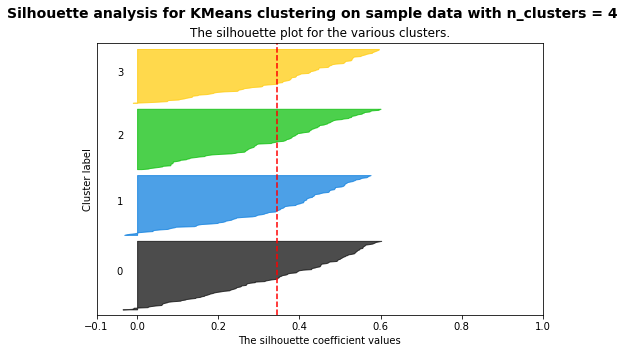

In [7]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np

fig, ax1 = plt.subplots(1)
fig.set_size_inches(8, 5)

# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df) + (num_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

clusterer = KMeans(n_clusters=num_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(df)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df, cluster_labels)
print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, cluster_labels)

y_lower = 10
for i in range(num_clusters):
     # Aggregate the silhouette scores for samples belonging to
     # cluster i, and sort them
     ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

     ith_cluster_silhouette_values.sort()

     size_cluster_i = ith_cluster_silhouette_values.shape[0]
     y_upper = y_lower + size_cluster_i

     color = cm.nipy_spectral(float(i) / num_clusters)
     ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
     ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

     # Compute the new y_lower for next plot
     y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % num_clusters),
                 fontsize=14, fontweight='bold')

plt.show()